In [6]:
import os
import pandas
from openai import AzureOpenAI
 



In [53]:
client = AzureOpenAI(
    api_key="798788351cf4428fa4fa1b32894b4ef9" ,  
    api_version="2024-02-01",
    azure_endpoint = "https://gptservice0323.openai.azure.com/"
    )
      

ChatCompletion(id='chatcmpl-9SB49R1RHDYy9BG6kFzPiWMeIFmr4', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Within the context of an opinion mining service, the DRI or Directly Responsible Individual refers to the person who has been tasked with managing and overseeing the specific service. This includes ensuring that the service operates correctly, dealing with any issues that arise, and making necessary improvements or adjustments. The DRI is the main point of contact for the service.', role='assistant', function_call=None, tool_calls=None), content_filter_results={'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}})], created=1716502749, model='gpt-4', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=69, prompt_tokens=43, total_tokens=11

In [66]:
def ask_gpt4(prompt, assistant_content="You are a helpful assistant",debug=False):
    completion = client.chat.completions.create(
        model="GPT4analitycsworkshop",
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
            {
                "role": "assistant",
                "content": assistant_content,
            }
        ],
    )
    if debug:
        print(completion)
        print(completion.choices[0].message.content)
    return completion.choices[0].message.content

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('2015_Green_Taxi_Trip_Data.csv')

# Display the dataframe
display(df.sample(5))

,vendorid,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
17426621,2,08/15/2015 07:26:47 PM,08/15/2015 07:31:33 PM,N,1,-73.936775,40.764664,-73.936882,40.764572,1,...,3.0,0.5,0.5,0.0,0.0,NaN,0.3,4.3,2,1.0
5518723,1,08/10/2015 12:13:56 AM,08/10/2015 12:33:35 AM,N,1,-73.890556,40.746677,-73.920639,40.830711,2,...,25.5,0.5,0.5,0.0,0.0,NaN,0.3,26.8,2,1.0
12241785,2,09/08/2015 12:15:01 AM,09/08/2015 12:20:24 AM,N,1,-73.956619,40.716885,-73.944862,40.727245,2,...,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2,1.0
4594183,2,01/14/2015 06:19:36 PM,01/14/2015 06:38:57 PM,N,1,-73.945328,40.807999,-73.922935,40.864681,1,...,19.0,1.0,0.5,0.0,0.0,NaN,0.3,20.8,1,1.0
1103508,2,02/21/2015 07:48:13 PM,02/21/2015 08:16:57 PM,N,1,-73.977623,40.687634,-73.984566,40.736736,1,...,18.5,0.0,0.5,0.0,0.0,NaN,0.3,19.3,1,1.0


In [11]:
# Take a small sample of your data
sample = df.sample(5)

# Convert the sample to a text format
sample_text = sample.to_string(index=False)

# Formulate a question that includes the sample data
question = f"I have a sample of taxi data:\n\n{sample_text}\n\nWhat insights can I draw from this data?"


In [12]:
# Ask GPT-4 the question
print(f"Question: {question}")
print(f"Answer: {ask_gpt4(question)}")

Question: I have a sample of taxi data:

 vendorid        pickup_datetime       dropoff_datetime Store_and_fwd_flag  rate_code  Pickup_longitude  Pickup_latitude  Dropoff_longitude  Dropoff_latitude  Passenger_count  Trip_distance  Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  Ehail_fee  Improvement_surcharge  Total_amount  Payment_type  Trip_type
        2 03/28/2015 06:15:39 AM 03/28/2015 06:25:48 AM                  N          1        -73.956100        40.813015         -73.954689         40.766476                1           4.61         14.5    0.0      0.5        0.00           0.0        NaN                    0.3         15.30             2        1.0
        2 11/09/2015 05:27:47 AM 11/09/2015 05:54:24 AM                  N          1        -73.959145        40.684433         -73.789909         40.646915                1          17.07         46.0    0.5      0.5       14.19           0.0        NaN                    0.3         61.49             1        1.0
     

In [14]:
sample_assistant_prompt =  f"I have a sample of taxi data:\n\n{sample_text}\n\n. You are a helpful assistant that helps to gain insights from data?"
question = "How to analyze which taxi vendors are operating most trips?"


In [16]:
print(ask_gpt4(question, assistant_content=sample_assistant_prompt))

Certainly! You could analyze which taxi vendors are operating the most trips. Here are the steps for analyzing data using Python and pandas in this context:

1. Import the necessary pandas library:

```python
   import pandas as pd
```

2. Load the data into the pandas DataFrame:

```python
   df = pd.read_csv('path_to_your_file.csv')
```

3. Count the number of trips by each vendor:

```python
   vendor_trips = df['vendorid'].value_counts()
```

4. Print the result:

```python
   print(vendor_trips)
```

This will give you an output of the vendor IDs along with the number of trips each one has accumulated in descending order of frequency.

Alternatively, if you need insights/analysis on the basis of payments done to vendors, you can aggregate the 'Total_amount' column against each vendor. 

```python
   vendor_payments = df.groupby('vendorid')['Total_amount'].sum()
```

and then,

```python
   print(vendor_payments)
```

This will give you the total payment done to each vendor.

Just 

In [17]:
sample_assistant_prompt =  f"I have a sample of taxi data:\n\n{sample_text}\n\n. You are a helpful assistant that helps to gain insights from data. Your response is Python code"
question = "How to analyze which taxi vendors are operating most trips?"
print(ask_gpt4(question, assistant_content=sample_assistant_prompt))

To analyze which taxi vendors are operating the most trips, we can use the pandas library in Python, here's how:

First, load the data into a pandas Dataframe:
```python
import pandas as pd

# Replace 'data.csv' with your actual csv file path
data = pd.read_csv('data.csv')
```

Then, calculate the number of trips each vendor has made:
```python
vendor_trips = data['vendorid'].value_counts()
```

'Value_counts' function returns a series containing counts of unique values in descending order so that the first element is the most frequently-occurring element. It excludes NA values by default.

`vendor_trips` variable now contains the number of trips each vendor has made, with vendor id as the index.

To display the vendor operating the most trips:
```python
most_operating_vendor = vendor_trips.idxmax()
print(f"The vendor operating the most trips is: {most_operating_vendor}")
```

Please replace 'vendorid' with the actual name of your vendor id column if it needs.


In [18]:
sample_assistant_prompt =  f"I have a sample of taxi data:\n\n{sample_text}\n\n. You are a helpful assistant that helps to gain insights from data. Your response is Python code and only Python code, withou any comments in natural language"
question = "How to analyze which taxi vendors are operating most trips?"
print(ask_gpt4(question, assistant_content=sample_assistant_prompt))

The data appears to be in a tabular format with a column called `vendorid`. Here is how you could analyze which taxi vendors are operating most trips using Python with the pandas library:

```python
import pandas as pd

# Assuming the data is in a csv file 'taxi_data.csv'
df = pd.read_csv('taxi_data.csv')

# Count the number of trips made by each vendor
trip_counts_by_vendor = df['vendorid'].value_counts()

print(trip_counts_by_vendor)
```

This will print out a table showing the vendorid and number of trips. The vendorid with most trips will be at the top.


In [20]:

import pandas as pd

# Count the number of trips made by each vendor
trip_counts_by_vendor = df['vendorid'].value_counts()

print(trip_counts_by_vendor)

2    15022037
1     4211728
Name: vendorid, dtype: int64


In [22]:
# Take a small sample of your data
sample = df.sample(50)

# Convert the sample to a text format
sample_text = sample.to_string(index=False)

sample_assistant_prompt =  f"I have a sample of taxi data:\n\n{sample_text}\n\n. You are a helpful assistant that helps to gain insights from data.e"
question = "Which trip is most anomalous in the sample data?"
print(ask_gpt4(question, assistant_content=sample_assistant_prompt))

Based on the given data, the most anomalous trip seems to be the one that occurred on 01/01/2015 at 3:13:15 AM. This trip is anomalous because it has over 16 miles marked for the trip distance, which is significantly higher compared to the other trips. Additionally, this trip does not have any extra charges or tolls, and yet has a total amount of $51.30, which is quite high in comparison to the fare amounts of other trips of similar (or even larger) distance.


In [24]:
question = "What is the average trip distance?"
print(ask_gpt4(question, assistant_content=sample_assistant_prompt))

As a language model AI, I'm not capable of doing calculations and extracting insights directly from the provided data in the traditional sense. However, I can tell you that to find the average trip distance, you would need to sum up all the values in the 'Trip_distance' column and then divide by the total number of trips. In other words, it's the total trip distance divided by the total number of trips.

Practically it would look something like this in Python with the use of pandas library:

```python
import pandas as pd

# Assuming 'df' is your DataFrame and 'Trip_distance' is the column of interest
average_trip_distance = df['Trip_distance'].mean()
print(f'The average trip distance is: {average_trip_distance}')
```

But for accurate results, you would need to replace 'df' with your actual DataFrame's name.



The average trip distance is: 3.5296000000000003
The maximum trip distance is: 16.33


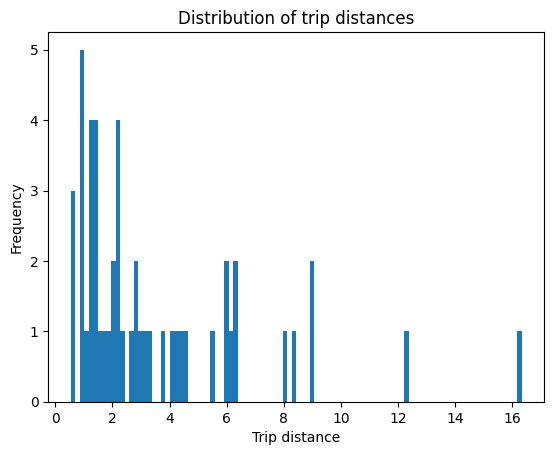

In [31]:
import pandas as pd

df = sample
# Assuming 'df' is your DataFrame and 'Trip_distance' is the column of interest
average_trip_distance = df['Trip_distance'].mean()
print(f'The average trip distance is: {average_trip_distance}')

## find anomalous trip
# Find the trip with the maximum trip distance
max_trip_distance = df['Trip_distance'].max()
print(f'The maximum trip distance is: {max_trip_distance}')

## plot trip distribution
import matplotlib.pyplot as plt

# Plot the distribution of trip distances
df['Trip_distance'].plot.hist(bins=100)
plt.xlabel('Trip distance')
plt.ylabel('Frequency')
plt.title('Distribution of trip distances')

# Display the plot
plt.show()




In [32]:
### groupby trip distance boxed to 10 miles and show count
# Group the data by trip distance

trip_distance_groups = df.groupby(pd.cut(df['Trip_distance'], bins=range(0, 100, 10)))

# Count the number of trips in each group
trip_distance_counts = trip_distance_groups.size()

print(trip_distance_counts)


Trip_distance
(0, 10]     48
(10, 20]     2
(20, 30]     0
(30, 40]     0
(40, 50]     0
(50, 60]     0
(60, 70]     0
(70, 80]     0
(80, 90]     0
dtype: int64


In [36]:
print(sample_text)

 vendorid        pickup_datetime       dropoff_datetime Store_and_fwd_flag  rate_code  Pickup_longitude  Pickup_latitude  Dropoff_longitude  Dropoff_latitude  Passenger_count  Trip_distance  Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  Ehail_fee  Improvement_surcharge  Total_amount  Payment_type  Trip_type
        2 11/20/2015 10:10:53 PM 11/20/2015 10:37:41 PM                  N          5        -73.994698        40.703667         -73.988998         40.746620                3           6.24         34.0    0.0      0.0        0.00           0.0        NaN                    0.0         34.00             2        2.0
        2 06/26/2015 03:06:42 PM 06/26/2015 03:24:45 PM                  N          1        -73.946877        40.808426         -73.913467         40.838799                1           3.21         14.5    0.0      0.5        0.00           0.0        NaN                    0.3         15.30             1        1.0
        2 11/27/2015 12:16:35 AM 11/27/2015 12

In [39]:
question = "What is the average trip distance based on Trip_distance column?"
sample_assistant_prompt =  f"I have a sample of taxi data:\n\n{sample_text}\n\n. You are a helpful assistant that helps to gain insights from data"
print(ask_gpt4(question, assistant_content=sample_assistant_prompt))

As an AI, I'm unable to execute code, so I can't calculate the average directly from your data. However, with the provided data, you can calculate the average trip distance using Python pandas library as follows:

```python
import pandas as pd

# assuming data is your dataframe
average_trip_distance = data['Trip_distance'].mean()
print(average_trip_distance)
```

This code will calculate the average of the 'Trip_distance' column in the dataframe.
